In [42]:
import pandas as pd
import numpy as np
from hazem_doc2vec.helper_functions import in_pickle, out_pickle
import data_analysis.preprocessor_end as pre
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sn


In [43]:
def precision(tp, fp): return tp / (tp + fp)
def recall(tp, fn): return tp / (tp + fn)
def f1_score(precision, recall): return 2 * ((precision * recall) / (precision + recall))
def accuracy(tp, fp, tn, fn): return (tp + tn) / (tp + fp + fn + tn)

In [44]:
%%time
X = in_pickle('data/X')     # Corpus "numpy vectors"
Y = in_pickle('data/Y')     # Corpus "numpy vector"

clf = SVC(C=10, gamma=0.001, probability=True)
scores = cross_val_score(clf, X, Y, cv=10, n_jobs=-1)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))


Accuracy: 0.72 (+/- 0.04)
CPU times: user 91.1 ms, sys: 50.6 ms, total: 142 ms
Wall time: 7min


In [40]:
%%time
clf.fit(X, Y)
out_pickle('data/svm_1', clf)
y_pred = clf.predict(X)
conf_mat = confusion_matrix(Y, y_pred)
print(conf_mat)


[[4463  258]
 [1495   78]]
CPU times: user 1min 35s, sys: 468 ms, total: 1min 36s
Wall time: 9min 59s


In [45]:
%%time
tn, fp, fn, tp = conf_mat.ravel()
precision = precision(tp, fp)
recall = recall(tp, fn)
f1_score = f1_score(precision, recall)
accuracy = accuracy(tp, fp, tn, fn)

CPU times: user 38 µs, sys: 1 µs, total: 39 µs
Wall time: 42.7 µs


In [46]:
(tn, fp, fn, tp)

(4463, 258, 1495, 78)

In [47]:
(precision, recall, f1_score, accuracy)


(0.23214285714285715,
 0.049586776859504134,
 0.08171817705605029,
 0.7214807753415952)

In [48]:
print(classification_report(Y, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.95      0.84      4721
           1       0.23      0.05      0.08      1573

   micro avg       0.72      0.72      0.72      6294
   macro avg       0.49      0.50      0.46      6294
weighted avg       0.62      0.72      0.65      6294



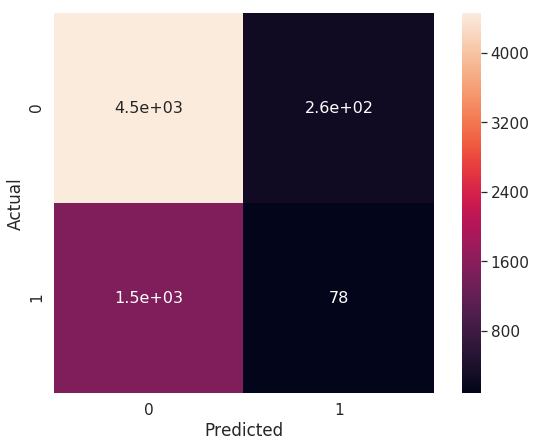

In [49]:
df_cm = pd.DataFrame(conf_mat)
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 16})# font size
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.imshow(df_cm)
plt.savefig('1.png')